In [178]:
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('netflix_titles.csv')

![title](netflix.jpg)

#### Netflix DataFrame

In [3]:
df.shape

(7787, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Посмотрим чего больше сеиалов или фильмов

In [162]:
tv_vs_serial_sns = df[['type', 'show_id']].groupby('type', as_index=False).count()

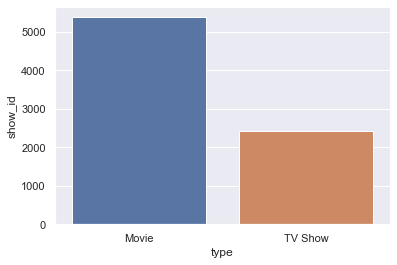

In [163]:
sns.barplot(x='type',
            y='show_id', 
            data=tv_vs_serial_sns,
           )

## "Провалимся" в каждую категорию и посмотрим распределение по странам

In [153]:
tv_country = df[['country', 'type']][df.type == 'TV Show'].\
groupby('country')['type'].count().sort_values(ascending=False).head(10).to_frame()

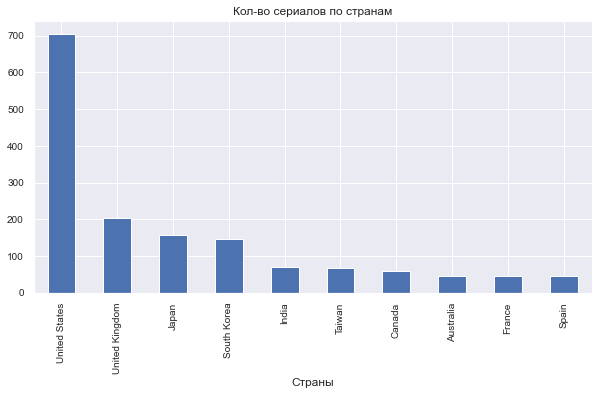

In [174]:
tv_country.plot(kind='bar',
               xlabel='Страны',
               title='Кол-во сериалов по странам',
               legend=False,
               figsize=(10,5),
               fontsize='10')

#### Наибольшее кол-во сериалов выпускают в Америке, следущими идут Великобритания , Япония и Южная Корея

In [168]:
movie_country = df[['country', 'type']][df.type == 'Movie'].\
groupby('country')['type'].count().sort_values(ascending=False).head(10).to_frame()

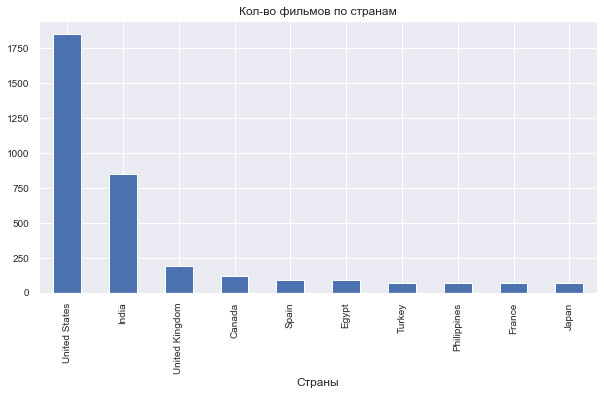

In [176]:
movie_country.plot(kind='bar',
               xlabel='Страны',
               title='Кол-во фильмов по странам',
               legend=False,
               figsize=(10,5),
               fontsize='10')

#### С фильмами немного другая ситуация, первое место так же за Америкой но теперь дальше идет Индия

# Посмотрим с каким рейтингом наиболее часто выпускают контент

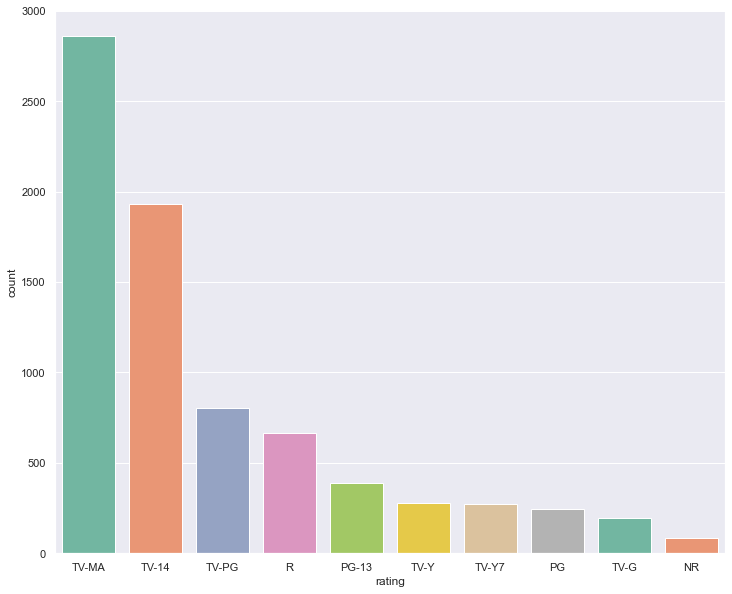

In [86]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x="rating", data=df, palette="Set2", order=df['rating'].value_counts().index[0:10])

# Страны с наибольшим кол-вом контента

In [108]:
countries = df.groupby('country', as_index=False)['show_id']\
.count().sort_values(by='show_id',ascending=False).head(5)
countries = countries.set_index('country')

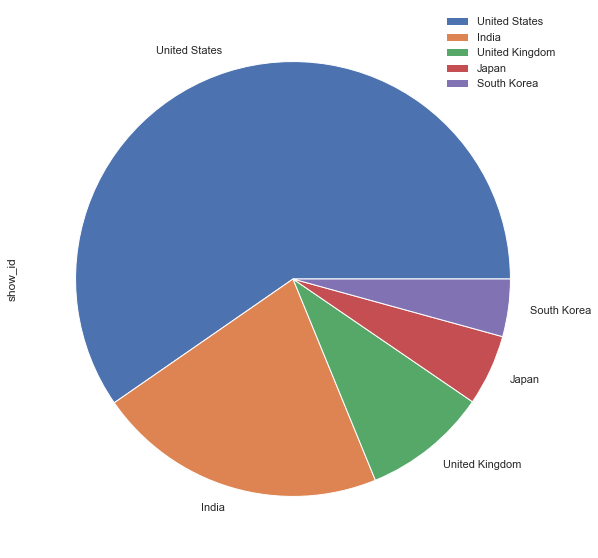

In [114]:
countries.plot(kind='pie',
              y='show_id',
            figsize=(10, 10)
              )